# Marketing Mix Model
https://github.com/takechanman1228/mmm_pydata_global_2022/blob/main/simple_end_to_end_demo_pydataglobal.ipynb?source=post_page-----b6d7de110ae6--------------------------------

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
path = "/Applications/Diego Alejandro/2024_1/HP/"
os.chdir(path)

# Data Reading

In [4]:
data = pd.read_excel('DMR_case_study_data.xlsx')

In [6]:
data.shape

(7013, 12)

In [7]:
data.isnull().sum()

Date                   0
ProductID              0
UnitSales              0
AvgSellingPrice        0
SearchImpressions      0
SearchClicks           0
DisplayImpressions    14
DisplayClicks          0
RadioSpots             0
DailySiteVisits        0
PagesperVisit          0
BounceRate             0
dtype: int64

In [8]:
data.fillna(0,inplace=True)

In [7]:
data.isnull().sum()

Date                  0
ProductID             0
UnitSales             0
AvgSellingPrice       0
SearchImpressions     0
SearchClicks          0
DisplayImpressions    0
DisplayClicks         0
RadioSpots            0
DailySiteVisits       0
PagesperVisit         0
BounceRate            0
dtype: int64

In [8]:
data.head(3)

,Date,ProductID,UnitSales,AvgSellingPrice,SearchImpressions,SearchClicks,DisplayImpressions,DisplayClicks,RadioSpots,DailySiteVisits,PagesperVisit,BounceRate
0,2019-08-02,300,230,26.905849,3906,67,10.0,0,0.0,1.139442e+06,4.50002,0.475409
1,2019-08-02,301,1712,22.784923,16420,495,10.0,0,0.0,1.139442e+06,4.50002,0.475409
2,2019-08-02,302,1442,20.954667,14598,480,10.0,0,0.0,1.139442e+06,4.50002,0.475409


# Data preparing

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [11]:
spark = SparkSession \
    .builder \
    .appName("HP_Marketing") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [12]:
sparkDF=spark.createDataFrame(data)

In [13]:
sparkDF.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- ProductID: string (nullable = true)
 |-- UnitSales: long (nullable = true)
 |-- AvgSellingPrice: double (nullable = true)
 |-- SearchImpressions: long (nullable = true)
 |-- SearchClicks: long (nullable = true)
 |-- DisplayImpressions: double (nullable = true)
 |-- DisplayClicks: long (nullable = true)
 |-- RadioSpots: double (nullable = true)
 |-- DailySiteVisits: double (nullable = true)
 |-- PagesperVisit: double (nullable = true)
 |-- BounceRate: double (nullable = true)



In [14]:
sparkDF.show(3)

+-------------------+---------+---------+----------------+-----------------+------------+------------------+-------------+----------+---------------+----------------+-----------------+
|               Date|ProductID|UnitSales| AvgSellingPrice|SearchImpressions|SearchClicks|DisplayImpressions|DisplayClicks|RadioSpots|DailySiteVisits|   PagesperVisit|       BounceRate|
+-------------------+---------+---------+----------------+-----------------+------------+------------------+-------------+----------+---------------+----------------+-----------------+
|2019-08-02 00:00:00|      300|      230|26.9058493081626|             3906|          67|              10.0|            0|       0.0|1139441.9118279|4.50002009141716|0.475408706149982|
|2019-08-02 00:00:00|      301|     1712|22.7849234042638|            16420|         495|              10.0|            0|       0.0|1139441.9118279|4.50002009141716|0.475408706149982|
|2019-08-02 00:00:00|      302|     1442| 20.954666909623|            14598

In [15]:
sparkDF.createOrReplaceTempView("data_") # this is used in order to call it inside the SQL syntax

In [16]:
q = "SELECT SUBSTRING(Date, 1, 10) AS Date, ROUND(SUM(UnitSales * AvgSellingPrice),2) AS Sales_, "\
    "ROUND((SUM(SearchImpressions * UnitSales) / SUM(UnitSales)),2) AS SearI, "\
    "ROUND(AVG(SearchClicks),2) AS SearC, ROUND(AVG(DisplayImpressions),2) AS DispI, "\
    "AVG(DisplayClicks) AS DispC, AVG(RadioSpots) AS Radio, "\
    "ROUND(AVG(DailySiteVisits),2) AS DailySV, ROUND(AVG(PagesperVisit),2) AS PagespV, "\
    "ROUND(AVG(BounceRate),2) AS BounceR "\
    "FROM data_ "\
    "GROUP BY Date ORDER BY Date ASC;"

In [60]:
out_join = spark.sql(q)

In [61]:
out_join.show()

+----------+---------+--------+------+---------+-----+-----+----------+-------+-------+
|      Date|   Sales_|   SearI| SearC|    DispI|DispC|Radio|   DailySV|PagespV|BounceR|
+----------+---------+--------+------+---------+-----+-----+----------+-------+-------+
|2019-08-02|518780.35|56003.91|153.63|     10.0|  0.0|  0.0|1139441.91|    4.5|   0.48|
|2019-08-03|343452.93|52063.35|125.19|     15.0|  0.0|  0.0|1178689.64|    4.0|   0.51|
|2019-08-04| 427414.8|56948.52|155.73|     13.0|  0.0|  0.0|1217203.92|   3.93|   0.51|
|2019-08-05|676967.76|62110.57|161.35|     16.0|  0.0|  0.0| 1263040.5|   4.88|   0.49|
|2019-08-06|715485.43|74106.85|182.26|     10.0|  0.0|  0.0|1316645.09|   4.59|    0.5|
|2019-08-07|652132.01|82741.73|160.84|     10.0|  0.0|  0.0|1222540.63|   4.35|   0.52|
|2019-08-08|594223.02|63017.76|147.79|1005270.0|349.0|  0.0|1224173.51|   4.37|   0.52|
|2019-08-09|551629.51|65246.27|154.06|1010793.0|377.0|  0.0|1314142.91|   4.41|    0.5|
|2019-08-10|406454.27|57566.32| 

In [62]:
n = out_join.count()
out_join.createOrReplaceTempView("data_cleaned")

In [63]:
print(f'Number of observations: {n}')

Number of observations: 364


In [64]:
df_main = out_join.toPandas()

In [65]:
df_main.head()

,Date,Sales_,SearI,SearC,DispI,DispC,Radio,DailySV,PagespV,BounceR
0,2019-08-02,518780.35,56003.91,153.63,10.0,0.0,0.0,1139441.91,4.50,0.48
1,2019-08-03,343452.93,52063.35,125.19,15.0,0.0,0.0,1178689.64,4.00,0.51
2,2019-08-04,427414.80,56948.52,155.73,13.0,0.0,0.0,1217203.92,3.93,0.51
3,2019-08-05,676967.76,62110.57,161.35,16.0,0.0,0.0,1263040.50,4.88,0.49
4,2019-08-06,715485.43,74106.85,182.26,10.0,0.0,0.0,1316645.09,4.59,0.50


https://github.com/sibylhe/mmm_stan

https://rsfagundes.medium.com/unveiling-the-power-of-media-mix-modeling-with-python-2c2de5b86f19

https://towardsdatascience.com/understanding-bayesian-marketing-mix-modeling-a-deep-dive-into-prior-specifications-af400adb836e

# Run under base environment in Anaconda

In [66]:
q1 = "SELECT SUBSTRING(Date, 1, 10) AS Date, "\
     "ROUND(UnitSales,2) AS sales, "\
     "ROUND(AvgSellingPrice,2) AS AvgSP, "\
     "ROUND(SearchImpressions,2) AS SearImp, "\
     "ROUND(SearchClicks,2) AS SearCli, "\
     "ROUND(DisplayImpressions,2) AS DispImp, "\
     "ROUND(DisplayClicks,2) AS DispCli, "\
     "ROUND(RadioSpots,2) AS Radio, "\
     "ROUND(DailySiteVisits,2) AS DailySV, "\
     "ROUND(PagesperVisit,2) AS Pages_pv, "\
     "ROUND(BounceRate,2) AS BounceR "\
     "FROM data_ WHERE ProductId = 300;"
p_300 = spark.sql(q1)

In [67]:
p_300.show(3)

+----------+-----+-----+-------+-------+-------+-------+-----+----------+--------+-------+
|      Date|sales|AvgSP|SearImp|SearCli|DispImp|DispCli|Radio|   DailySV|Pages_pv|BounceR|
+----------+-----+-----+-------+-------+-------+-------+-----+----------+--------+-------+
|2019-08-02|  230|26.91|   3906|     67|   10.0|      0|  0.0|1139441.91|     4.5|   0.48|
|2019-08-03|  176|25.76|   3611|     46|   15.0|      0|  0.0|1178689.64|     4.0|   0.51|
|2019-08-04|  208|26.23|   4700|     67|   13.0|      0|  0.0|1217203.92|    3.93|   0.51|
+----------+-----+-----+-------+-------+-------+-------+-----+----------+--------+-------+
only showing top 3 rows



In [69]:
df_p300 = p_300.toPandas()
df_p300.head(3)

,Date,sales,AvgSP,SearImp,SearCli,DispImp,DispCli,Radio,DailySV,Pages_pv,BounceR
0,2019-08-02,230,26.91,3906,67,10.0,0,0.0,1139441.91,4.50,0.48
1,2019-08-03,176,25.76,3611,46,15.0,0,0.0,1178689.64,4.00,0.51
2,2019-08-04,208,26.23,4700,67,13.0,0,0.0,1217203.92,3.93,0.51


# Model here try to be implemented is found at:

https://github.com/takechanman1228/mmm_pydata_global_2022/blob/main/simple_end_to_end_demo_pydataglobal.ipynb?source=post_page-----b6d7de110ae6--------------------------------

In [2]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro

In [7]:
# pip install scikit-learn

In [8]:
# pip install lightweight_mmm

In [3]:
from lightweight_mmm import preprocessing         # for the CustomScaler
from lightweight_mmm import lightweight_mmm       # for model trainig
from lightweight_mmm import plot                  # for the plot_media_channel_posteriors method
from lightweight_mmm import optimize_media        # for optimization

ModuleNotFoundError: No module named 'lightweight_mmm'

In [133]:
SEED = 105

In [89]:
# 1. media variables
mdsp_cols = ['SearImp','DispImp','SearCli','DispCli']

# 2. control variables
# macro economics variables
me_cols = []                  # there are no macroeconomic variables
# store count variables
st_cols = ['AvgSP','Radio','DailySV','Pages_pv','BounceR']
# markdown/discount variables
mrkdn_cols = []               # there are no discount variables
# holiday variables
hldy_cols = []                # there are no holiday variables
# seasonality variables
seas_cols = []                # there are no seasonality variables 

# control_vars = hldy_cols + seas_cols
control_vars = ['AvgSP','Radio','DailySV','Pages_pv','BounceR']

base_vars = me_cols + st_cols + mrkdn_cols + hldy_cols + seas_cols

# 3. sales variables
sales_cols =['sales']

In [73]:
# media_data = df_p300[['SearImp','DispImp','SearCli','DispCli']].to_numpy()
# extra_features = df_p300[['AvgSP','Radio','DailySV','Pages_pv','BounceR']].to_numpy()
# target = df_p300['sales'].to_numpy()

In [74]:
data_size = len(df_p300)
print(f'Number of observations: {data_size}')

Number of observations: 344


In [90]:
n_media_channels = len(mdsp_cols)
n_extra_features = len(control_vars)
media_data = df_p300[mdsp_cols].to_numpy()
extra_features = df_p300[control_vars].to_numpy()
target = df_p300['sales'].to_numpy()
costs = df_p300[mdsp_cols].sum().to_numpy()

In [24]:
24*5

120

We can then split the dataset into train and test. Lets leave only the last 24 weeks for testing in this case.

In [92]:
# Split and scale data ---------------------------------------------
test_data_period_size = 60     # 100 days which is kinf of representative for the 24 weeks
split_point = data_size - test_data_period_size
# Media data -------------------------------------------------------
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Extra features ---------------------------------------------------
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]
# Target -----------------------------------------------------------
target_train = target[:split_point]

Scaling is essential for many modelling problems and this one is no exception.

- In most cases you will need 3 or 4 scalers.
- One scaler for the media data, one for the target and one for costs.
- Optionally if you are adding extra features those might need an extra scaler. 

- It is very important that you save and "carry with you" those scalers throughout your MMM journey as LighweightMMM will allow you to re-insert these scalers at different points to ensure everything is always in the correct scale and results. If some results don't make sense, it might be a scaling problem.


- In this demo we divide the data on media, extra features and the target by their mean to ensure that the result has a mean of 1.
- This allows the model to be agnostic to the scale of the inputs (e.g. a user can use either the number of sales or the value of sales).
- The costs are not used in the model directly, they are only used to inform the prior distributions on the media variables. These costs have been scaled down by multiplying by 0.15 to reflect typical ranges in MMMs.

In [93]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

# Model Specification
https://lightweight-mmm.readthedocs.io/en/latest/models.html

$$kpi_t = \alpha + trend_t + seasonality_t + mediachannels_t + otherfactors_t$$

Intercept

- $\alpha = HalfNormal(2)$

Trend

- $trend_t = \mu t^k$
- $\mu \sim Normal(0,1)$
- $k \sim Uniform(0.5,1.5)$
- where t is a linear trend input



In [ ]:
correlations, variances, spend_fractions, variance_inflation_factors = preprocessing.check_data_quality(
    media_data=media_scaler.transform(media_data),
    target_data=target_scaler.transform(target),
    cost_data=costs,
    extra_features_data=extra_features_scaler.transform(extra_features))

# Training the model

The currently available models are the following:

- hill_adstock
- adstock
- carryover

In [94]:
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")

# Training the model will require the following mandatory parameters:

- media
- total_costs (one value per channel)
- target

We can optionally also pass the following:

- extra_features: Other variables to add to the model.
- degrees_seasonality: Number of degrees to use for seasonality. Default is 3.
- seasonality_frequency: Frequency of the time period used. Default is 52 as in 52 weeks per year.
- media_names: Names of the media channels passed.
- number_warmup: Number of warm up samples. Default is 1000.
- number_samples: Number of samples during sampling. Default is 1000.
- number_chains: Number of chains to sample. Default is 2.

['SearImp', 'DispImp', 'SearCli', 'DispCli']

In [110]:
mmm.fit(
    media = media_data_train,
    media_prior = costs,
    target = target_train,
    extra_features = extra_features_train,
    number_warmup=3000,
    number_samples=7000,
    media_names = mdsp_cols,
    seed=105)

/Users/dportelacassab/anaconda3/lib/python3.11/site-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|█| 10000/10000 [01:23<00:00, 119.51it/s, 1 steps of size 1.90e-02. acc. pro
sample: 100%|█| 10000/10000 [01:21<00:00, 122.12it/s, 66 steps of size 2.16e-02. acc. pr


In [111]:
mmm.print_summary()


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
             coef_extra_features[0]     -0.14      0.14     -0.15     -0.36      0.09    739.03      1.00
             coef_extra_features[1]      0.17      0.03      0.17      0.12      0.22   2246.88      1.00
             coef_extra_features[2]      2.28      0.37      2.28      1.68      2.89   4032.26      1.00
             coef_extra_features[3]     -0.40      0.25     -0.40     -0.82     -0.02   4059.50      1.00
             coef_extra_features[4]     -1.64      0.55     -1.61     -2.57     -0.76   1270.40      1.00
                      coef_media[0]      0.01      0.00      0.00      0.00      0.01   6446.95      1.00
                      coef_media[1]      0.53      0.32      0.48      0.02      1.00    432.28      1.00
                      coef_media[2]      0.00      0.00      0.00      0.00      0.00   5927.73      1.00
                      coef_media[3]      0.00

In [109]:
mdsp_cols

['SearImp', 'DispImp', 'SearCli', 'DispCli']

In [113]:
# plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=mdsp_cols)

LightweightMMM also allows you to visualize the prior and posterior distributions for every model parameter at once. Note that we use a kernel density estimator to smooth these distributions for easier interpretability; you may need to adjust the bandwidth of the smoother depending on the shapes of your distributions. Also, this plot can take several minutes to run, especially if using geo-level models. Lowering the number_of_samples_for_prior or restricting to a subset of selected_features can speed up the runtime.

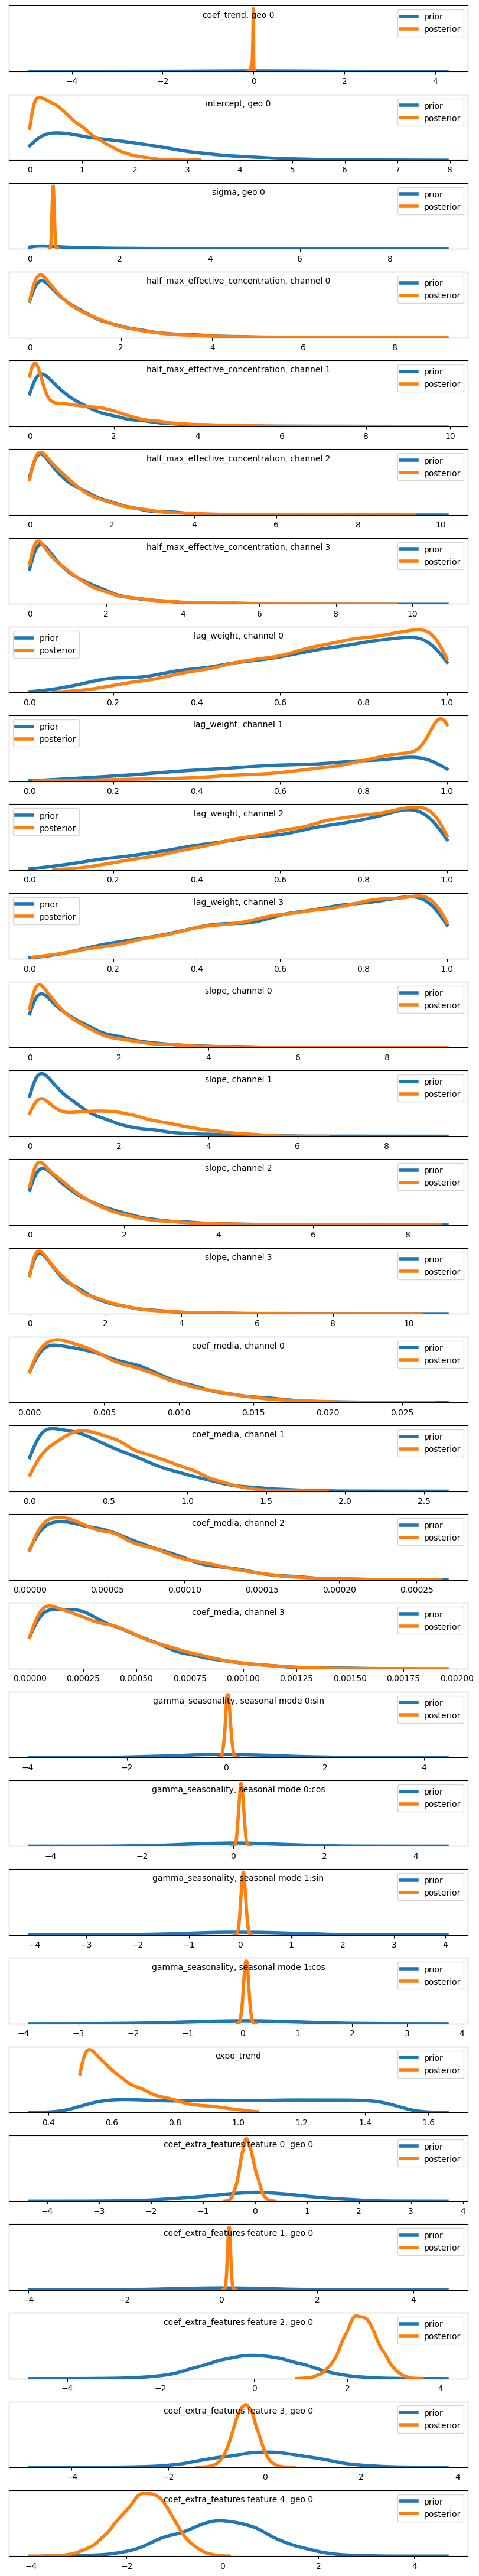

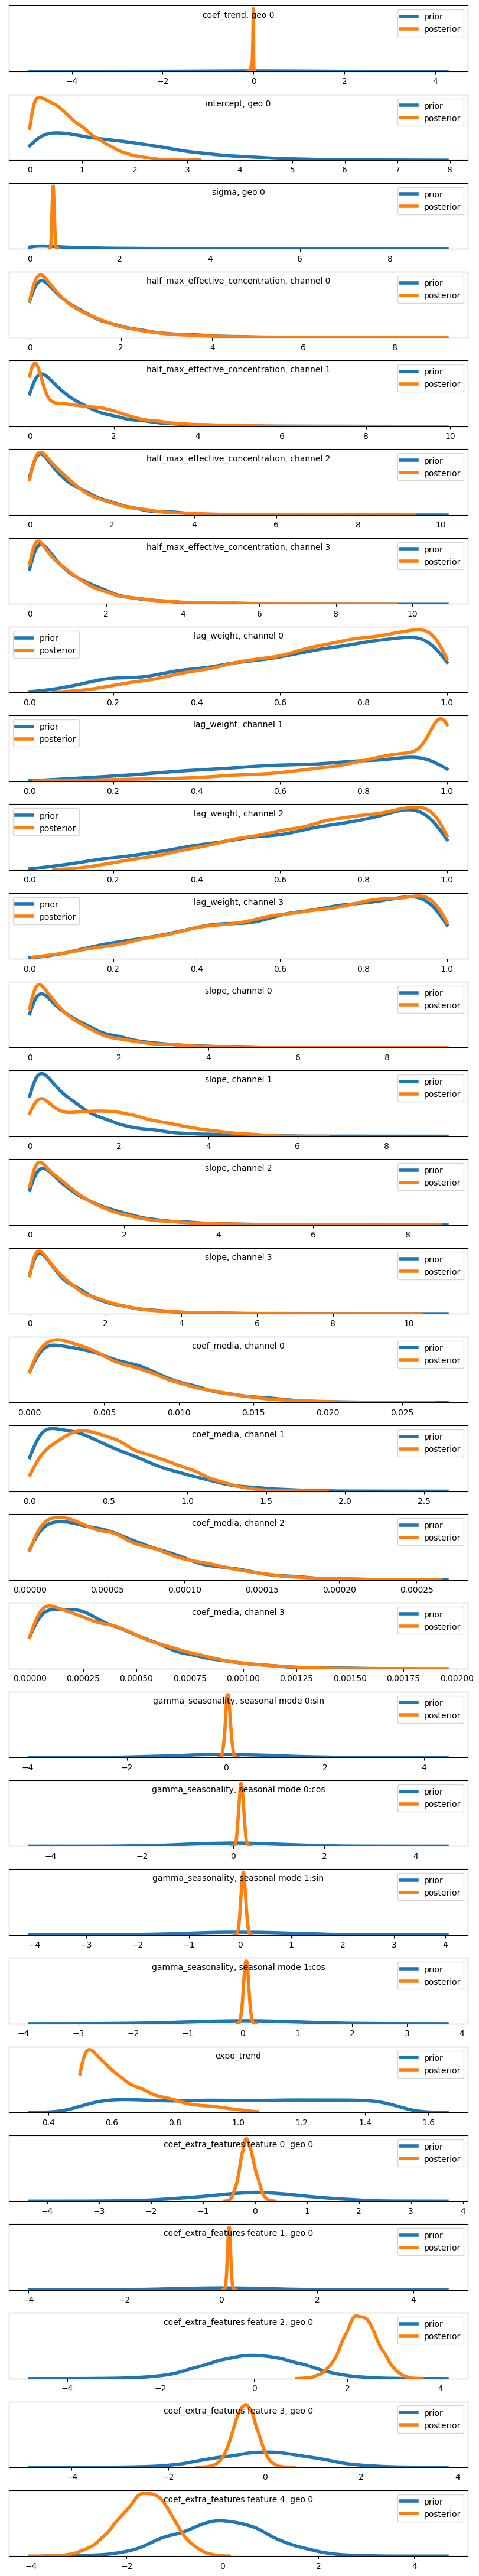

In [114]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

One can also check your model's fit to the training data.

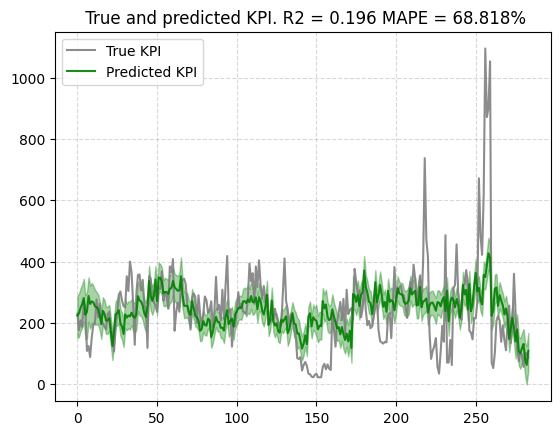

In [115]:
# Here is another example where we can pass the target scaler if you want the plot to be in the "not scaled scale"
plot.plot_model_fit(mmm, target_scaler=target_scaler)

If one wants to run predictions on unseen data they can rely on the predict method:

In [116]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              extra_features=extra_features_scaler.transform(extra_features_test),
                              seed=105)

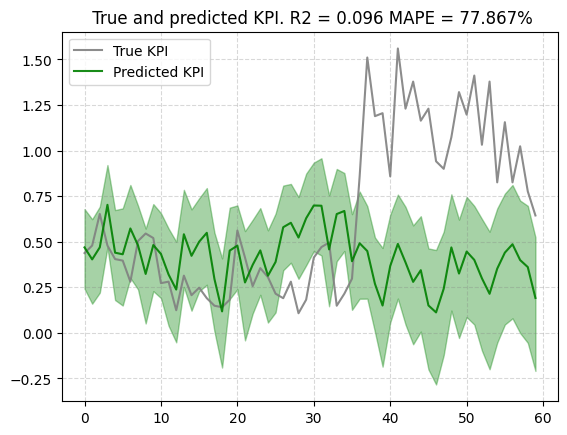

In [117]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:]))

# Media Insights

In [118]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

We can quickly visualise the estimated media & baseline contribution over time

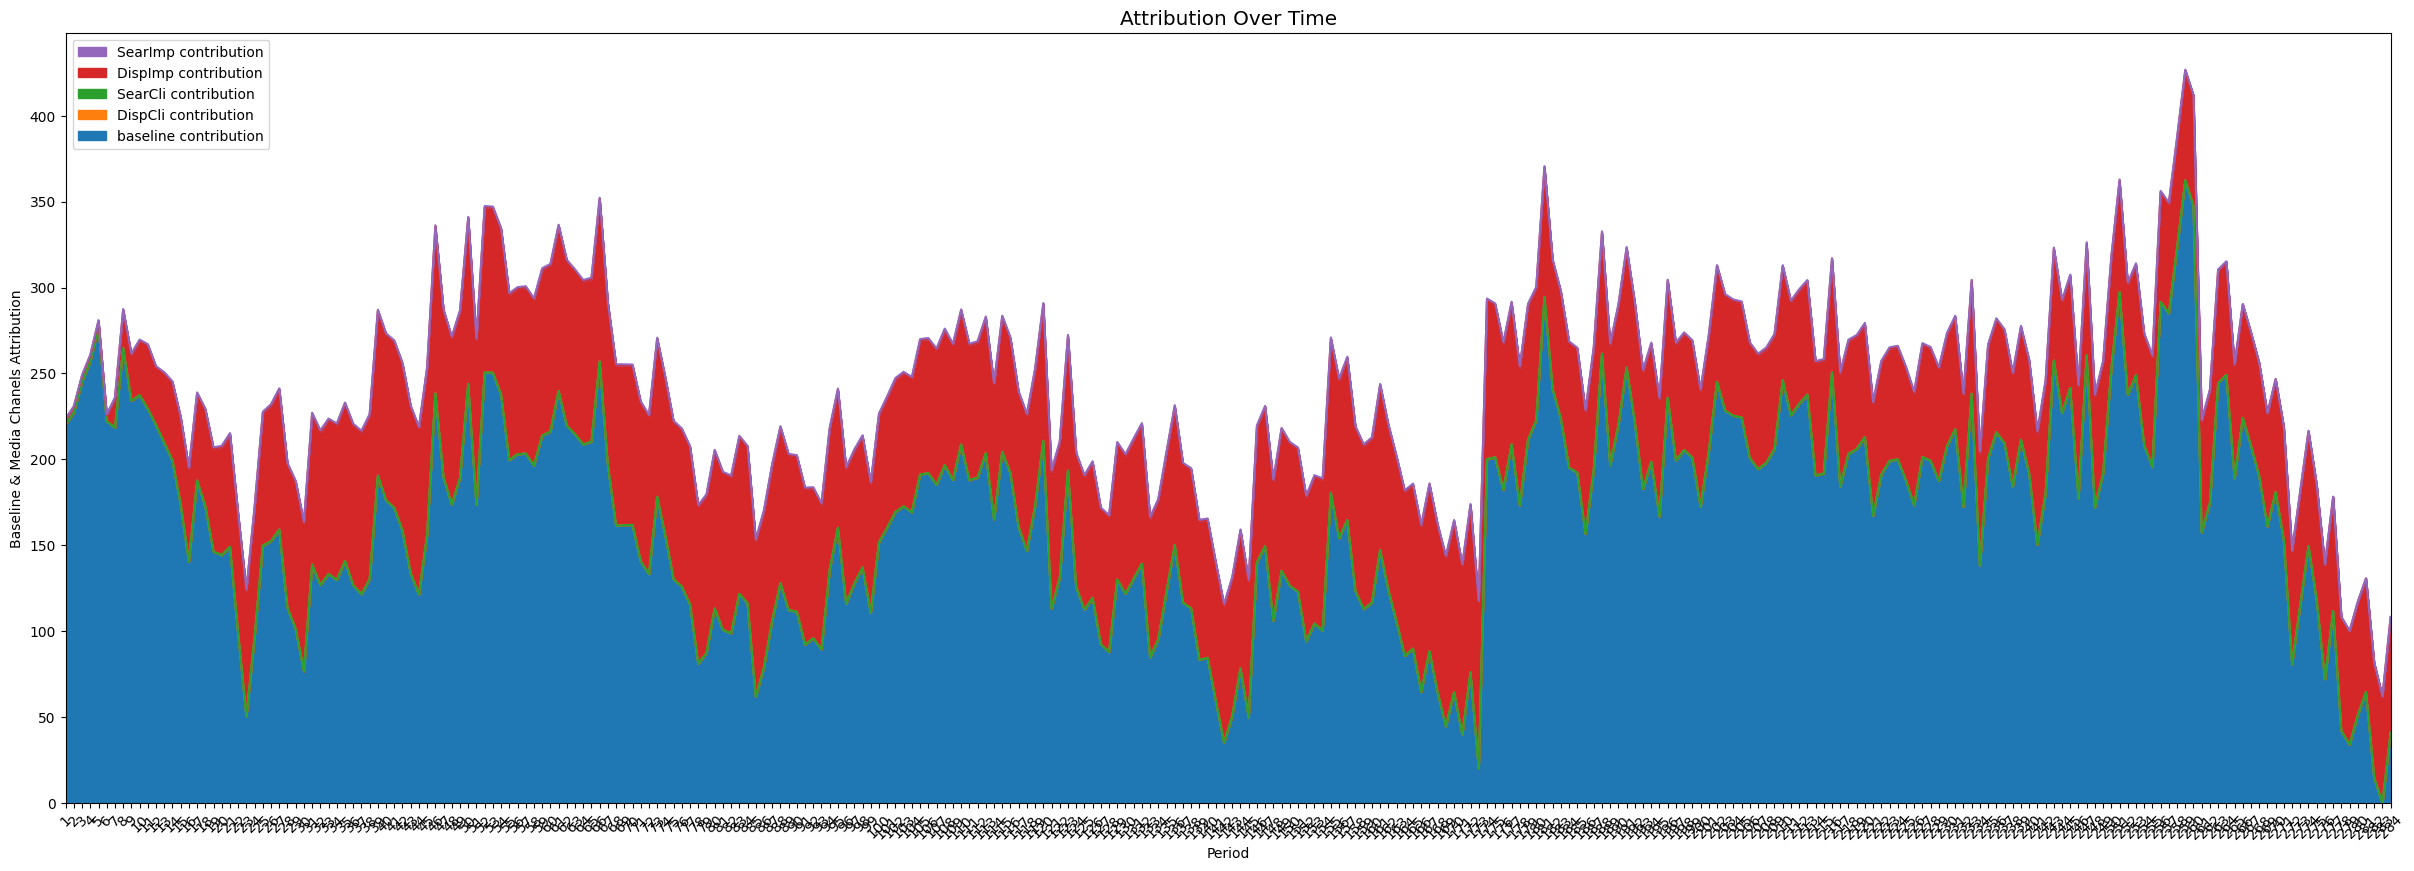

In [119]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )

We can quickly visualise the estimated media contributions with their respective credibility intervals

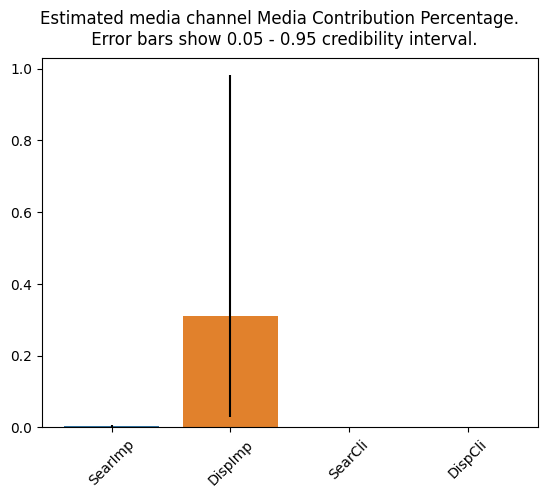

In [120]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)

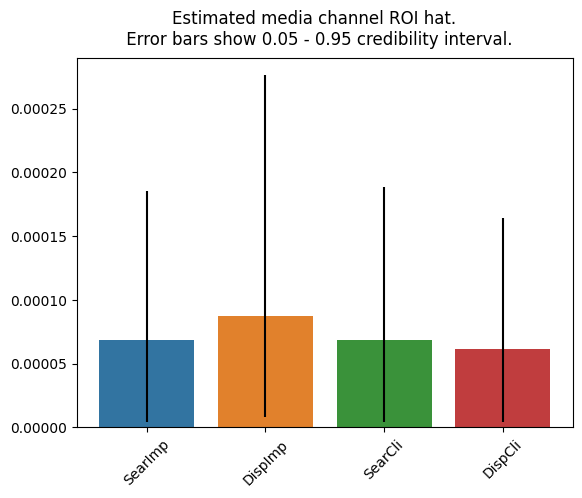

In [121]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=mdsp_cols)

Another vital question we can solve with MMMs is how each media channel behaves individually as we invest more in it.

For that we can plot the curve response of all media channels with the following function:

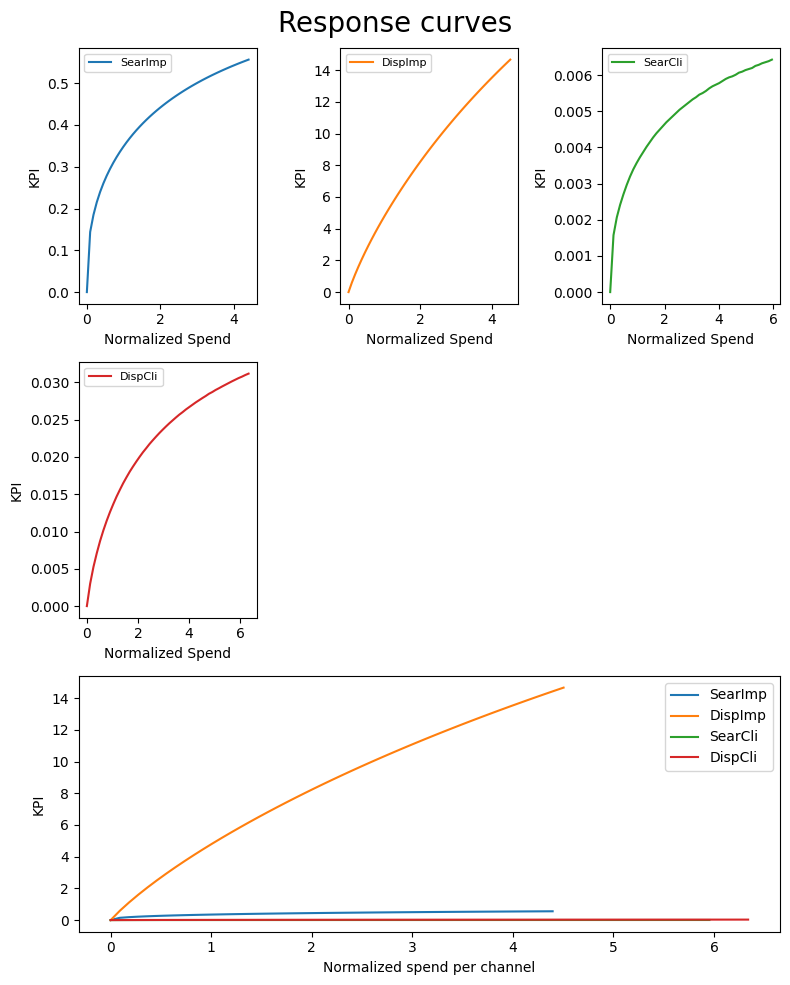

In [122]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, seed=105)

# Optimization

The optimization is meant to solve the budget allocation questions for you. First you need to provide for how long you want to optimize your budget (eg. 15 weeks in this case).
The optimization values will be bounded by +- 20% of the max and min historic values used for training. Which means the optimization won't recommend to completely change your strategy but how to make some budget re-allocation.

You can change that percentage with the following parameters: - bounds_lower_pct - bounds_upper_pct

Which can hold 1 value for all channels or 1 value per channel.
Prices are the average price you would expect for the media units of each channel. If your data is already a money unit (eg. $) your prices should be an array of 1s.

In [123]:
prices = jnp.ones(mmm.n_media_channels)

The budget is how much one would like to allocate throughtout the total of n_time_periods. Make sure this amount is inline with the historic spend or otherwise some conditions/bounds in the optimization might not be met.

In [124]:
n_time_periods = 20
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [127]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=105)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2252.5381646362735
            Iterations: 2
            Function evaluations: 18
            Gradient evaluations: 2


If your media data is not in money unit (eg. impressions, clicks, GRPs, etc.), you would need to store the cost per values (eg. CPC) in the prices array and multiply it by solution.x to get the recommended budget allocation.

In [128]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([1.2458559e+05, 1.4274440e+07, 1.4379083e+03, 1.1058538e+04],      dtype=float32)

In [129]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([1.2458563e+05, 1.4274440e+07, 1.4379478e+03, 1.1058577e+04],      dtype=float32)

In [130]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(14411522., dtype=float32), Array(14411522., dtype=float32))

We can double check the budget constraint was met:

In [131]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(14411522., dtype=float32), Array(14411522., dtype=float32))

We can plot the following:

- Pre post optimization budget allocation comparison for each channel
- Pre post optimization predicted target variable comparison

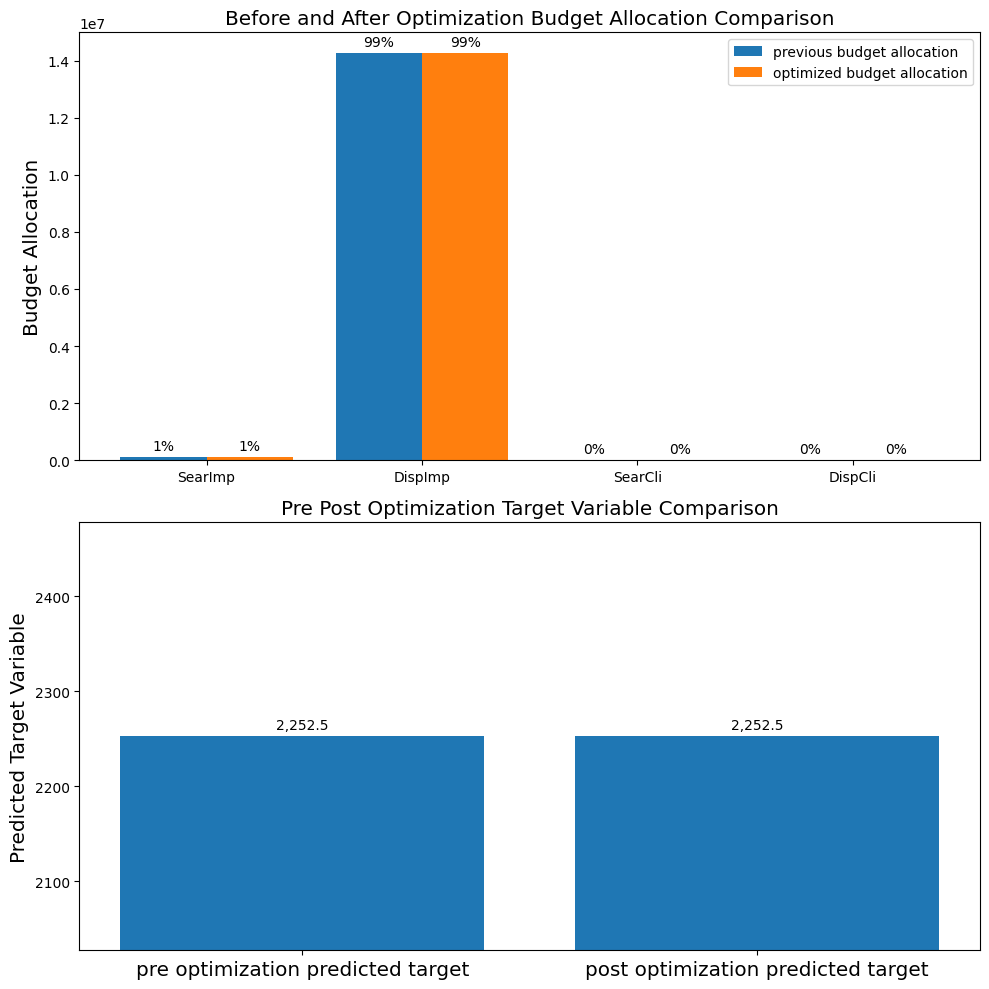

24/02/21 07:08:58 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1796674 ms exceeds timeout 120000 ms
24/02/21 07:08:58 WARN SparkContext: Killing executors is not supported by current scheduler.
24/02/21 07:09:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [132]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)

# Brief Presentation
https://www.linkedin.com/pulse/lightweight-marketing-mix-modeling-mmm-using-python-jared-randall/